# Управляемая кластеризация

Определение:
Управляемая кластеризация – это подход в кластерном анализе, при котором процесс группировки данных корректируется или направляется с помощью ***заранее заданных критериев***, ограничений или экспертных знаний. В отличие от полностью автоматической (неуправляемой) кластеризации, когда алгоритм сам находит естественные группы в данных, здесь результат дорабатывается с учётом внешней информации, что позволяет получать кластеры, более соответствующие бизнес‑целям или специфике предметной области

# Seeded Clustering

модификация KMeans, где начальные центры кластеров (seeds) задаются заранее.

In [4]:
import numpy as np
from sklearn.cluster import KMeans

# Исходные данные
X = np.random.rand(100, 2)  # 100 точек в 2D пространстве

# Определяем "семена" (начальные центры кластеров)
seeds = np.array([[0.2, 0.2], [0.5, 0.5], [0.8, 0.8]])

# Запуск KMeans с начальным заданием центроидов
kmeans = KMeans(n_clusters=len(seeds), init=seeds, n_init=1)
kmeans.fit(X)

# Вывод результатов
print("Координаты центров кластеров:")
print(kmeans.cluster_centers_)


Координаты центров кластеров:
[[0.28088616 0.20308794]
 [0.82052001 0.22580498]
 [0.45366252 0.78040691]]


Этот метод полезен, когда у вас есть предварительная информация о структуре данных, и вы хотите направить кластеризацию.

# Constrained Clustering

используются ограничения: размеров кластеров (например, минимальное или максимальное количество элементов в каждом кластере), фиксированных центроидов (например, некоторые точки должны быть центрами кластеров), геометрических ограничений (например, кластеры должны быть компактными или иметь определённую форму), чтобы объединять или разделять определённые объекты.

In [ ]:
import numpy
from copkmeans.cop_kmeans import cop_kmeans
input_matrix = numpy.random.rand(100, 500)
must_link = [(0, 10), (0, 20), (0, 30)]
cannot_link = [(1, 10), (2, 10), (3, 10)]
clusters, centers = cop_kmeans(dataset=input_matrix, k=5, ml=must_link,cl=cannot_link)

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs

# Генерация данных
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Запуск кластеризации
kmedoids = KMedoids(n_clusters=3, random_state=42)
labels = kmedoids.fit_predict(X)

print("Метки кластеров:", labels)

Этот метод полезен, если у вас есть частичная информация о принадлежности объектов к классам.

# Supervised K-Means

Этот подход использует информацию о метках классов для улучшения процесса кластеризации. Идея состоит в том, чтобы кластеры соответствовали классам насколько это возможно.

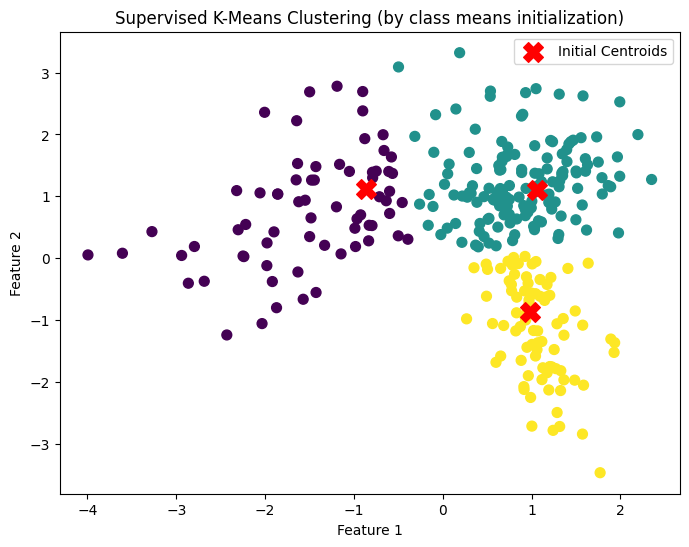

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from collections import defaultdict
import matplotlib.pyplot as plt

# Сгенерируем классификационные данные
X_clf, y_clf = make_classification(n_samples=300, n_features=2, n_informative=2,
                                   n_redundant=0, n_classes=3, random_state=0,
                                   n_clusters_per_class=1)

# Найдем средние значения признаков для каждого класса
class_means = defaultdict(list)
for i in range(len(X_clf)):
    class_means[y_clf[i]].append(X_clf[i])

initial_centroids = [np.mean(class_means[i], axis=0) for i in sorted(class_means.keys())]
initial_centroids = np.array(initial_centroids)

# Применим K-Means с инициализированными центроидами
n_clusters_clf = len(np.unique(y_clf))
kmeans_supervised = KMeans(n_clusters=n_clusters_clf, init=initial_centroids, n_init=1)
labels_supervised = kmeans_supervised.fit_predict(X_clf)

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=labels_supervised, cmap='viridis', s=50)
plt.title('Supervised K-Means Clustering (by class means initialization)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], marker='X', s=200, color='red', label='Initial Centroids')
plt.legend()
plt.show()

# Pairwise Constrained Clustering

Этот подход использует попарные ограничения (какие точки должны быть в одном кластере, а какие нет) для обучения модели кластеризации. Алгоритмы, такие как PCKMeans (Pairwise Constrained K-Means), явно учитывают эти ограничения.

In [5]:
from sklearn_extra.cluster import PCKMeans

# Используем те же данные, что и для Constrained K-Means

# Зададим попарные ограничения
pairwise_constraints = (must_link, cannot_link)

# Инициализируем и обучим модель PCKMeans
kmeans_pck = PCKMeans(n_clusters=n_clusters, random_state=random_state, constraints=pairwise_constraints)
labels_pck = kmeans_pck.fit_predict(X)

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_pck, cmap='viridis', s=50)
plt.title('Pairwise Constrained K-Means (PCKMeans)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

# Semi-Supervised Clustering

частично размеченые данные

In [7]:
from sklearn.semi_supervised import LabelPropagation
import numpy as np

# Генерация данных
X = np.random.rand(100, 2)
labels = np.full(100, -1)  # -1 означает неизвестный кластер
labels[:10] = 0  # Первые 10 точек принадлежат кластеру 0
labels[10:20] = 1  # Следующие 10 точек принадлежат кластеру 1

# Запуск кластеризации
model = LabelPropagation()
model.fit(X, labels)
predicted_labels = model.predict(X)

print("Предсказанные метки кластеров:", predicted_labels)

Предсказанные метки кластеров: [0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1
 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0]
